In [485]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.keys())
data = digits["data"]
images = digits["images"]
target = digits["target"]
target_names = digits["target_names"]

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [486]:
import numpy as np
import matplotlib.pyplot as plt

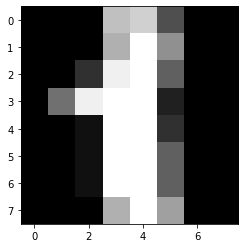

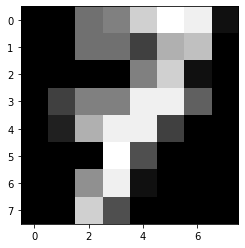

In [487]:
plt.figure()
plt.gray()
plt.imshow(images[1], interpolation="nearest")
plt.show()
plt.imshow(images[7], interpolation="nearest")
plt.show()

In [488]:
x = images[7]
x[0][6] = 0

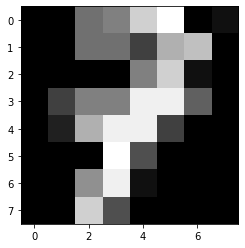

In [489]:
plt.imshow(x, interpolation="nearest")
plt.show()

In [490]:
def reduce_dim(x):
    # limit to pixel [7][4] and [0][6]
    # images is 7 if [7][4] is dark and [0][6] is white, otherwise image is 1
    return np.array([[image[7*8+4], image[0*8+6]] for image in x])

In [491]:
one_indices = np.where(target == 1)
one_labels = target[one_indices]
one_images = data[one_indices]

seven_indices = np.where(target == 7)
seven_labels = target[seven_indices]
seven_images = data[seven_indices]

one_images_reduced = reduce_dim(one_images)
seven_images_reduced = reduce_dim(seven_images)


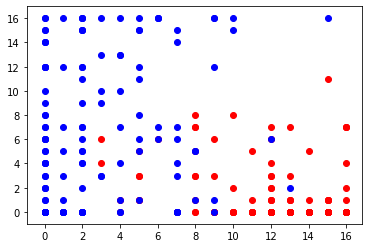

In [492]:
x1 = [ image[0] for image in one_images_reduced]
y1 = [ image[1] for image in one_images_reduced]
plt.scatter(x=x1, y=y1, c="red")
x2 = [ image[0] for image in seven_images_reduced] 
y2 = [ image[1] for image in seven_images_reduced] 
plt.scatter(x=x2, y=y2, c="blue")

In [493]:
def nearest_mean(training_features, training_labels, test_features):
    labels = np.unique(training_labels)
    mean = np.zeros((labels.size,2))
    for label in labels:
        indices = np.where(training_labels == label)
        features = training_features[indices]
        features_sum = np.sum(features, axis=0)
        features_mean = features_sum / features.size

        label_index = np.where(labels == label)
        mean[label_index] = features_mean

    def dist_vec(a, b):
        squared_diff = np.square(a[:,None] - b)
        sum_diffs = np.sum(squared_diff, axis=2)
        result = np.sqrt(sum_diffs)
        return result
    

    distances = dist_vec(test_features, mean)

    return np.array([labels[np.argmin(distance)] for distance in distances])

In [494]:
from sklearn import model_selection

X_all = data
y_all = target
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data, digits.target, test_size = 0.4, random_state = 0)

one_indices_train = np.where(y_train == 1)
one_labels_train = y_train[one_indices_train]
one_images_train = X_train[one_indices_train]

seven_indices_train = np.where(y_train == 7)
seven_labels_train = y_train[seven_indices_train]
seven_images_train = X_train[seven_indices_train]

one_images_reduced_train = reduce_dim(one_images_train)
seven_images_reduced_train = reduce_dim(seven_images_train)

one_indices_test = np.where(y_test == 1)
one_labels_test = y_test[one_indices_test]
one_images_test = X_test[one_indices_test]

seven_indices_test = np.where(y_test == 7)
seven_labels_test = y_test[seven_indices_test]
seven_images_test = X_test[seven_indices_test]

one_images_reduced_test = reduce_dim(one_images_test)
seven_images_reduced_test = reduce_dim(seven_images_test)


training_features = np.concatenate((one_images_reduced_train, seven_images_reduced_train))
training_labels = np.concatenate((one_labels_train, seven_labels_train))

test_features = np.concatenate((one_images_reduced_test, seven_images_reduced_test))
test_labels = np.concatenate((one_labels_test, seven_labels_test))

In [495]:
predicted_labels = nearest_mean(training_features, training_labels, test_features)

In [496]:
np.sum((predicted_labels != test_labels)) / test_labels.size * 100

10.144927536231885

In [497]:
# find vectorized method
decision_regions = []
for i in range(200):
    for j in range(200):
        decision_regions.append([i,j])

decision_regions = np.array(decision_regions)

In [498]:
predicted_labels_decision_regions = nearest_mean(training_features, training_labels, decision_regions)

In [499]:

one_indices_decision_regions = np.where(predicted_labels_decision_regions == 1)
ones_decision_regions = decision_regions[one_indices_decision_regions]

seven_indices_decision_regions = np.where(predicted_labels_decision_regions == 7)
sevens_decision_regions = decision_regions[seven_indices_decision_regions]

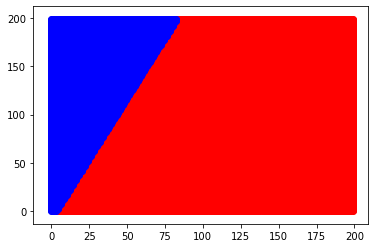

In [500]:
x1 = [ image[0] for image in ones_decision_regions]
y1 = [ image[1] for image in ones_decision_regions]
plt.scatter(x=x1, y=y1, c="red")
x2 = [ image[0] for image in sevens_decision_regions] 
y2 = [ image[1] for image in sevens_decision_regions] 
plt.scatter(x=x2, y=y2, c="blue")